***Importing the libraries***

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt

***Importing the 'tweet_for_analysis.txt' file.***

In [5]:
tweets = open("tweet_for_analysis.txt").read()

Before analysing we need to clean the data i.e. converting the data into a set of meaningful words that can be analysis to estimate the sentiment. We will perform the following steps -

***1. Converting the text into lowercase***

In [12]:
lower_case = tweets.lower()
lower_case

"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d\nis upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!\n@kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds\nmy whole body feels itchy and like its on fire \n@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there. \n@kwesidei not the whole crew \nneed a hug \n@loltrish hey  long time no see! yes.. rains a bit ,only a bit  lol , i'm fine thanks , how's you ?\n@tatiana_k nope they didn't have it \n@twittera que me muera ? \nspring break in plain city... it's snowing \ni just re-pierced my ears \n@caregiving i couldn't bear to watch it.  and i thought the ua loss was embarrassing . . . . .\n@octolinz16 it it counts, idk why i did either. you never talk to me anymore \n@smarrison i would've been the first, but i didn't have a 

The following are the different types of punctuation that can be found in thw text.

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

***2. Removing punctuations.***

In [14]:
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
cleaned_text

'switchfoot httptwitpiccom2y1zl  awww thats a bummer  you shoulda got david carr of third day to do it d\nis upset that he cant update his facebook by texting it and might cry as a result  school today also blah\nkenichan i dived many times for the ball managed to save 50  the rest go out of bounds\nmy whole body feels itchy and like its on fire \nnationwideclass no its not behaving at all im mad why am i here because i cant see you all over there \nkwesidei not the whole crew \nneed a hug \nloltrish hey  long time no see yes rains a bit only a bit  lol  im fine thanks  hows you \ntatianak nope they didnt have it \ntwittera que me muera  \nspring break in plain city its snowing \ni just repierced my ears \ncaregiving i couldnt bear to watch it  and i thought the ua loss was embarrassing     \noctolinz16 it it counts idk why i did either you never talk to me anymore \nsmarrison i wouldve been the first but i didnt have a gun    not really though zac snyders just a doucheclown\niamjazzyf

***3. Tokenization*** - splitting a phrase, sentence, paragraph, one or multiple text into smaller units. Each of these smaller units are referred as a token. These token can be anything a word, subword or even a character. In our case it is a word, number, slang, abbreviation, etc.



In [15]:
tokenized_words = cleaned_text.split()
tokenized_words

['switchfoot',
 'httptwitpiccom2y1zl',
 'awww',
 'thats',
 'a',
 'bummer',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it',
 'd',
 'is',
 'upset',
 'that',
 'he',
 'cant',
 'update',
 'his',
 'facebook',
 'by',
 'texting',
 'it',
 'and',
 'might',
 'cry',
 'as',
 'a',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'kenichan',
 'i',
 'dived',
 'many',
 'times',
 'for',
 'the',
 'ball',
 'managed',
 'to',
 'save',
 '50',
 'the',
 'rest',
 'go',
 'out',
 'of',
 'bounds',
 'my',
 'whole',
 'body',
 'feels',
 'itchy',
 'and',
 'like',
 'its',
 'on',
 'fire',
 'nationwideclass',
 'no',
 'its',
 'not',
 'behaving',
 'at',
 'all',
 'im',
 'mad',
 'why',
 'am',
 'i',
 'here',
 'because',
 'i',
 'cant',
 'see',
 'you',
 'all',
 'over',
 'there',
 'kwesidei',
 'not',
 'the',
 'whole',
 'crew',
 'need',
 'a',
 'hug',
 'loltrish',
 'hey',
 'long',
 'time',
 'no',
 'see',
 'yes',
 'rains',
 'a',
 'bit',
 'only',
 'a',
 'bit',
 'lol',
 'im',
 'fine',
 '

***Creating a list of stopwords***

Words in a sentence that doesn't add meaning to the sentence are referred as stopwords. For example - I, at, they, was, is ,etc.
We need to filter out the stopwords before processing our text for sentiments since they are insifnificant.

In [16]:
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance",
              "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", 
              "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", 
              "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another",
              "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently",
              "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's",
              "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1",
              "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", 
              "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", 
              "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but",
              "bx","by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain",
              "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", 
              "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", 
              "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", 
              "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different",
               "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", 
              "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty",
              "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", 
              "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere",
              "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find",
              "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty",
              "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets",
              "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", 
              "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", 
              "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein","heres",
              "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", 
              "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", 
              "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", 
              "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates",
              "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't",
              "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just",
              "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", 
              "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely",
              "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", 
              "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", 
              "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", 
              "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", 
              "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", 
              "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not",
              "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", 
              "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto",
              "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside",
              "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular",
              "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm",
              "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

***Removing stopwords from our text***

In [17]:
resulted_words = []
for word in tokenized_words:
  if word not in stop_words:
    resulted_words.append(word)

resulted_words

['switchfoot',
 'httptwitpiccom2y1zl',
 'awww',
 'bummer',
 'shoulda',
 'david',
 'carr',
 'day',
 'upset',
 'update',
 'facebook',
 'texting',
 'result',
 'school',
 'today',
 'blah',
 'kenichan',
 'dived',
 'times',
 'ball',
 'managed',
 'save',
 '50',
 'rest',
 'bounds',
 'body',
 'feels',
 'itchy',
 'nationwideclass',
 'behaving',
 'mad',
 'kwesidei',
 'crew',
 'hug',
 'loltrish',
 'hey',
 'long',
 'time',
 'rains',
 'bit',
 'bit',
 'lol',
 'fine',
 'hows',
 'tatianak',
 'nope',
 'didnt',
 'twittera',
 'muera',
 'spring',
 'break',
 'plain',
 'city',
 'snowing',
 'repierced',
 'ears',
 'caregiving',
 'bear',
 'watch',
 'thought',
 'ua',
 'loss',
 'embarrassing',
 'octolinz16',
 'counts',
 'idk',
 'talk',
 'smarrison',
 'wouldve',
 'didnt',
 'gun',
 'zac',
 'snyders',
 'doucheclown',
 'iamjazzyfizzle',
 'watch',
 'iamlilnicki',
 'premiere',
 'hollis',
 'death',
 'scene',
 'hurt',
 'severely',
 'watch',
 'film',
 'wry',
 'directors',
 'cut',
 'file',
 'taxes',
 'lettya',
 'ahh',
 'iv

***Importing 'emotions.txt' file and creating a list of emotions present in our text.***

In [18]:
emotion_list = []
with open('/content/emotions.txt', 'r') as file_emotion:
  for line in file_emotion:
    clear_line = line.replace('\n','').replace(',', '').replace("'", '').strip()
    word, emotions = clear_line.split(":")
    
    if word in resulted_words:
      emotion_list.append(emotions)

emotion_list

[' angry',
 ' esteemed',
 ' powerless',
 ' bored',
 ' happy',
 ' fearful',
 ' happy',
 ' surprise',
 ' attracted',
 ' angry',
 ' sad',
 ' sad',
 ' demoralized',
 ' angry',
 ' fearful',
 ' happy',
 ' ecstatic',
 ' focused',
 ' cheated',
 ' free',
 ' angry',
 ' angry',
 ' happy',
 ' sad',
 ' happy',
 ' sad',
 ' happy',
 ' fearful',
 ' sad',
 ' apathetic',
 ' alone',
 ' alone',
 ' lost',
 ' attached',
 ' happy',
 ' angry',
 ' attracted',
 ' safe',
 ' sad',
 ' fearful',
 ' surprise',
 ' independent',
 ' surprise',
 ' anxious',
 ' anxious',
 ' fearful',
 ' happy',
 ' attached',
 ' hated',
 ' fearful',
 ' fearful',
 ' codependent',
 ' fearful',
 ' embarrassed',
 ' adequate',
 ' happy',
 ' hated',
 ' loved',
 ' attracted',
 ' happy',
 ' fearful',
 ' sad']

***Creating a dictionary which contains the count of every emotion present in the text.***

In [19]:
emotion_count = Counter(emotion_list)
emotion_count

Counter({' angry': 6,
         ' esteemed': 1,
         ' powerless': 1,
         ' bored': 1,
         ' happy': 10,
         ' fearful': 9,
         ' surprise': 3,
         ' attracted': 3,
         ' sad': 7,
         ' demoralized': 1,
         ' ecstatic': 1,
         ' focused': 1,
         ' cheated': 1,
         ' free': 1,
         ' apathetic': 1,
         ' alone': 2,
         ' lost': 1,
         ' attached': 2,
         ' safe': 1,
         ' independent': 1,
         ' anxious': 2,
         ' hated': 2,
         ' codependent': 1,
         ' embarrassed': 1,
         ' adequate': 1,
         ' loved': 1})

***Visualizing the emotion count*** - To estimate which type of emotions/sentiments are present in our text.

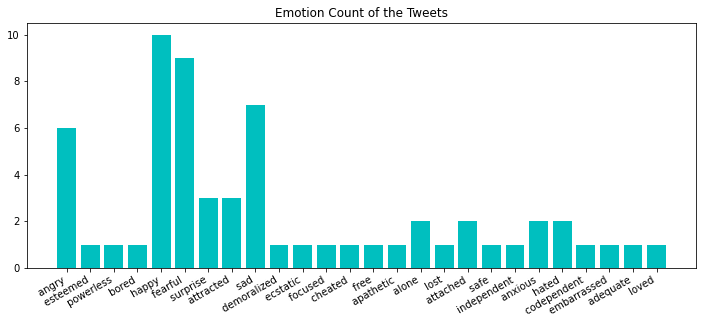

In [20]:
fig, ax1 = plt.subplots(figsize = (12,5))
ax1.bar(emotion_count.keys(), emotion_count.values(), color = 'c')
plt.title("Emotion Count of the Tweets")
fig.autofmt_xdate()
plt.show()